c:\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited at iteration 2000 with accuracies 
[1.43183826e-14 4.51735864e-07 1.92355578e-07 4.95696523e-07
 2.04125963e-06 1.67968389e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1833 instead with accuracy 
1.6330224875800766e-06.

  _, diffusion_map = lobpcg(
c:\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[6.54953163e-15 4.51288966e-07 2.26606153e-07 5.65212009e-07
 8.53437233e-07 7.70154590e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


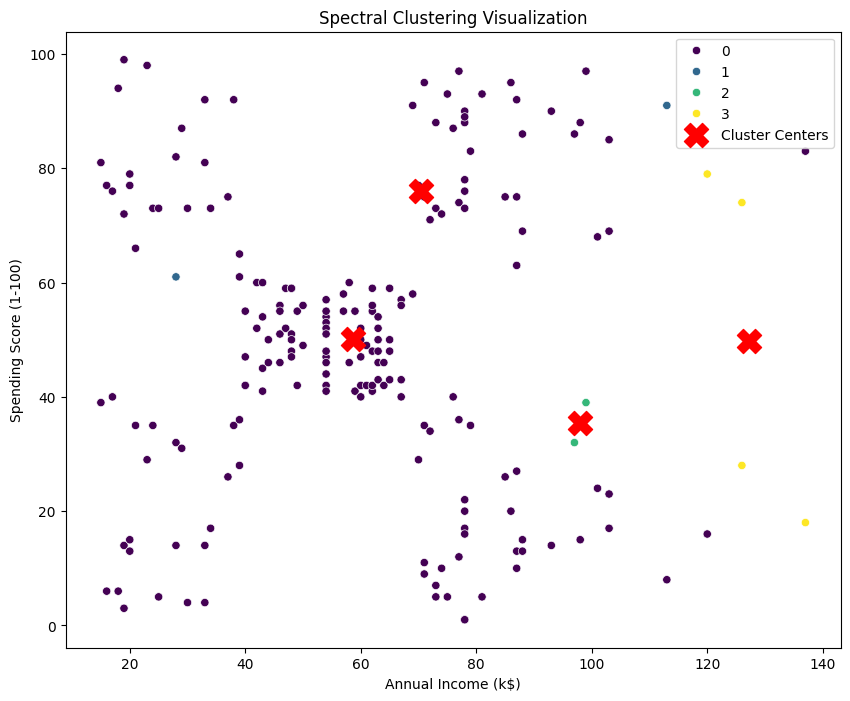

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
dataset = pd.read_csv('../Mall_Customers.csv')

# Extract the relevant features
X = dataset.iloc[:, 3:5].values

# Assuming `dataset` is a DataFrame with your data and X is your feature matrix

# Apply Agglomerative Clustering
aff_prop = SpectralClustering(n_clusters=5)
y_aff_prop = aff_prop.fit_predict(X)

# Add cluster group to the dataset
supervised = dataset.copy()
supervised['Cluster_group'] = y_aff_prop

# Save the clustered dataset to a CSV file
supervised.to_csv("cluster_aglo.csv", index=False)

# Select only numeric columns for centroid calculation
numeric_columns = supervised.select_dtypes(include=[np.number])

# Compute mean positions of each cluster
centroids = numeric_columns.groupby(supervised['Cluster_group']).mean().values

# Visualize the clusters
plt.figure(figsize=(10, 8))

# Scatter plot
sns.scatterplot(x=supervised.iloc[:, 3], y=supervised.iloc[:, 4], hue=supervised['Cluster_group'], palette='viridis', legend='full')

# Plot centroids (mean positions of clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Cluster Centers', marker='X')
plt.title('SpectralClustering Clustering Visualization')

plt.legend()
plt.show()
